## RapidWright Jupyter Notebook - Hello, World!
This Jupyter Notebook uses RapidWright to create a simple placed and routed design for the [PYNQ-Z1 ](https://store.digilentinc.com/pynq-z1-python-productivity-for-zynq-7000-arm-fpga-soc/) from scratch.  It generates a circuit that looks like this:
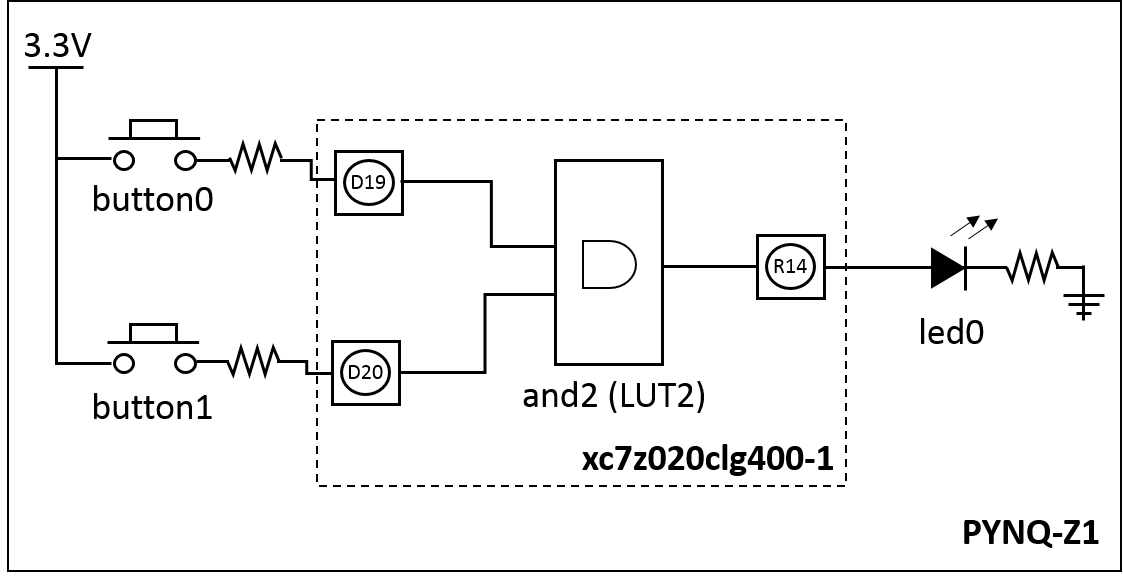

In [1]:
# Import RapidWright classes
from com.xilinx.rapidwright.design import Cell
from com.xilinx.rapidwright.design import Design
from com.xilinx.rapidwright.design import Net
from com.xilinx.rapidwright.design import PinType
from com.xilinx.rapidwright.design import Unisim
from com.xilinx.rapidwright.device import Device
from com.xilinx.rapidwright.router import Router

# Create a new empty design
design = Design("HelloWorld",Device.PYNQ_Z1)

# Create cells and place them
and2    = design.createAndPlaceCell("and2", Unisim.AND2, "SLICE_X100Y100/A6LUT")
button0 = design.createAndPlaceIOB("button0", PinType.IN,  "D19", "LVCMOS33")
button1 = design.createAndPlaceIOB("button1", PinType.IN,  "D20", "LVCMOS33")
led0    = design.createAndPlaceIOB("led0",    PinType.OUT, "R14", "LVCMOS33")

# Wire up the AND gate to buttons and LEDs
net0 = design.createNet("button0_IBUF")
net0.connect(button0, "O")
net0.connect(and2, "I0")

net1 = design.createNet("button1_IBUF")
net1.connect(button1, "O")
net1.connect(and2, "I1")

net2 = design.createNet("and2")
net2.connect(and2, "O")
net2.connect(led0, "I")

# Route intra-site connections
design.routeSites()

# Route inter-site connections
Router(design).routeDesign()

# Write out the placed and routed DCP
design.writeCheckpoint("HelloWorld-PYNQ_Z1.dcp")

Once you run the notebook, a "HelloWorld-PYNQ_Z1.dcp" file will appear in the tree and you can download it, open it in Vivado to generate a bitstream.